In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data
from portfolios_toolkit import markowitz_weights

### Building a Portfolio ###

In [7]:
tickers = get_tickers("6.1")

tickers

['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

In [8]:
# DataFrame to store everything
returns_df = pd.DataFrame()

for ticker in tickers:
    df_stock = get_market_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2026-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    returns_df = pd.concat([returns_df, returns], axis=1)

In [4]:
returns_df

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
2020-01-03 00:00:00,-0.009770,-0.012213,-0.005245,-0.005305,-0.012530,-0.016135,0.029203
2020-01-06 00:00:00,0.007937,0.014776,0.026305,0.018658,0.002582,0.004185,0.019072
2020-01-07 00:00:00,-0.004714,0.002089,-0.001934,0.002161,-0.009160,0.012034,0.038067
2020-01-08 00:00:00,0.015958,-0.007839,0.007092,0.010087,0.015803,0.001874,0.048033
2020-01-09 00:00:00,0.021018,0.004788,0.010443,0.014209,0.012415,0.010923,-0.022189
...,...,...,...,...,...,...,...
2025-06-13 00:00:00,-0.013901,-0.005360,-0.005880,-0.015245,-0.008199,-0.021118,0.019243
2025-06-16 00:00:00,0.009978,0.018683,0.011951,0.028569,0.008762,0.018978,0.011674
2025-06-17 00:00:00,-0.014110,-0.005941,-0.004650,-0.006989,-0.002298,-0.003947,-0.039604
2025-06-18 00:00:00,0.004793,-0.010764,-0.015060,-0.002096,0.004592,0.009392,0.017858


In [5]:
# Portfolio's Expected Returns
expected_returns = returns_df.mean()
expected_returns.name = 'mean_returns'

expected_returns

AAPL     0.000741
AMZN     0.000577
GOOGL    0.000653
META     0.000863
MSFT     0.000829
NVDA     0.002317
TSLA     0.001762
Name: mean_returns, dtype: float64

In [6]:
# Covariance Matrix
covariance_matrix = returns_df.cov()

covariance_matrix

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
AAPL,0.000422,0.000284,0.000272,0.000332,0.000289,0.000422,0.000445
AMZN,0.000284,0.000519,0.000309,0.000407,0.000300,0.000466,0.000448
GOOGL,0.000272,0.000309,0.000429,0.000376,0.000291,0.000425,0.000382
META,0.000332,0.000407,0.000376,0.000812,0.000340,0.000534,0.000441
MSFT,0.000289,0.000300,0.000291,0.000340,0.000368,0.000453,0.000382
NVDA,0.000422,0.000466,0.000425,0.000534,0.000453,0.001179,0.000721
TSLA,0.000445,0.000448,0.000382,0.000441,0.000382,0.000721,0.001831


In [7]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0015
)

In [8]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = returns_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL     0.132366
AMZN    -0.160840
GOOGL    0.128794
META    -0.024260
MSFT     0.451826
NVDA     0.403099
TSLA     0.069015
Name: weights, dtype: float64

In [9]:
# Portfolio Returns
portfolio_returns = returns_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

portfolio_returns

2020-01-03   -0.010026
2020-01-06    0.005779
2020-01-07    0.002078
2020-01-08    0.015252
2020-01-09    0.011494
                ...   
2025-06-11   -0.001338
2025-06-12    0.009521
2025-06-13   -0.012254
2025-06-16    0.011577
2025-06-17   -0.006704
Name: portfolio_returns, Length: 1371, dtype: float64

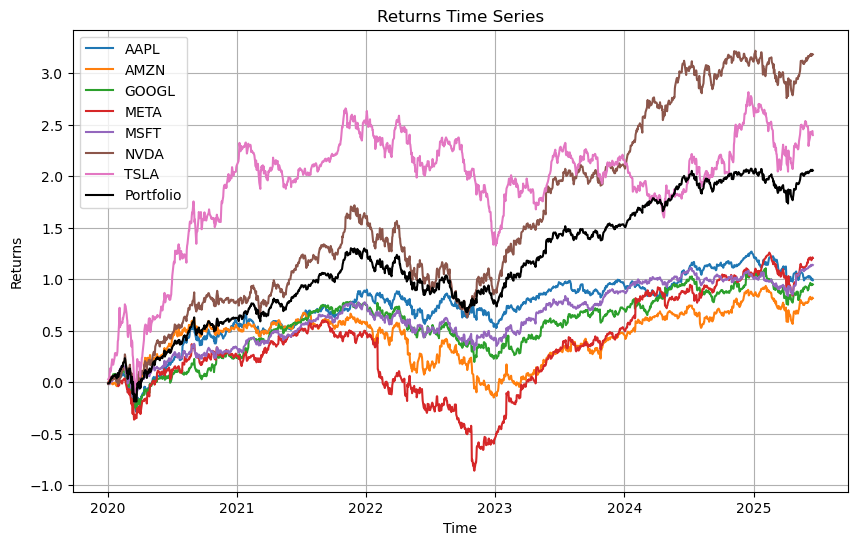

In [10]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(returns_df.cumsum(), label=returns_df.columns, alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', color='black', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

### Getting a Benchmark: Using a Hypothetical Portfolio ###

In [11]:
# Get the returns of each stock of our portfolio but in the IWY
bench_weights = pd.Series(
    [5.88, 3.93, 2.02, 2.97, 6.86, 6.83, 1.78],
    index = returns_df.columns,
    name = 'weights'
)

bench_weights = bench_weights/100

# Normalized
norm_bench_weights = bench_weights/bench_weights.sum()

norm_bench_weights

AAPL     0.194252
AMZN     0.129832
GOOGL    0.066733
META     0.098117
MSFT     0.226627
NVDA     0.225636
TSLA     0.058804
Name: weights, dtype: float64

In [12]:
# Build the Benchmark Returns
benchmark_returns = returns_df @ norm_bench_weights
benchmark_returns.name = 'benchmark_returns'

benchmark_returns

2020-01-03   -0.009117
2020-01-06    0.009697
2020-01-07    0.002317
2020-01-08    0.010374
2020-01-09    0.010769
                ...   
2025-06-11   -0.008937
2025-06-12    0.004746
2025-06-13   -0.010776
2025-06-16    0.014919
2025-06-17   -0.008249
Name: benchmark_returns, Length: 1371, dtype: float64

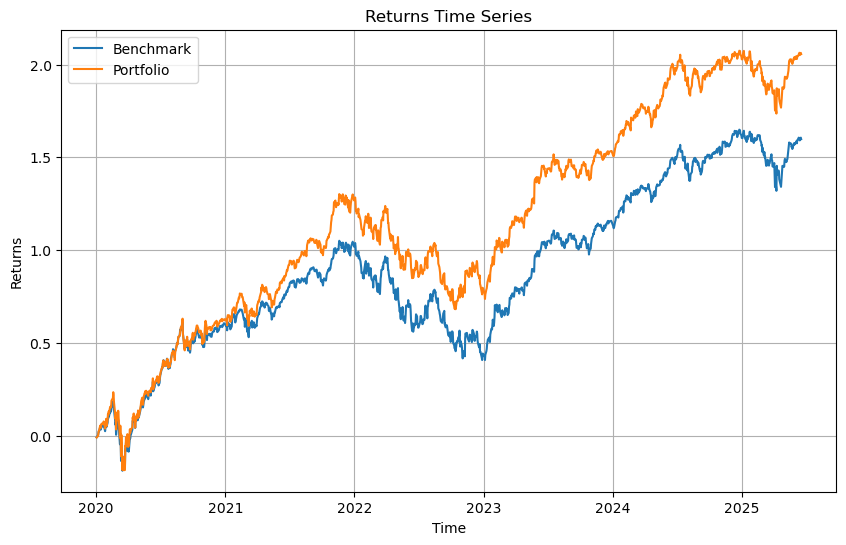

In [13]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [14]:
# Calculate the Mean Returns
portfolio_total_returns = portfolio_returns.cumsum().iloc[-1]
benchmark_total_returns = benchmark_returns.cumsum().iloc[-1]

print(portfolio_total_returns)
print(benchmark_total_returns)

2.0564999999999984
1.5979939218099377


In [15]:
# Calculate the Excess Returns
excess_returns = portfolio_total_returns - benchmark_total_returns

excess_returns

0.45850607819006073

In [16]:
# Create a Comparison DF
comparison_df = pd.DataFrame(index = returns_df.columns)
comparison_df['portfolio_weights'] = portfolio_weights
comparison_df['benchmark_weights'] = norm_bench_weights
comparison_df['stocks_returns'] = returns_df.cumsum().iloc[-1]
comparison_df['portfolio_returns'] = comparison_df['portfolio_weights'] * comparison_df['stocks_returns']
comparison_df['benchmark_returns'] = comparison_df['benchmark_weights'] * comparison_df['stocks_returns']

# The Alphas (Portfolio - Benchmark)
comparison_df['alphas'] = comparison_df['portfolio_returns'] - comparison_df['benchmark_returns']
comparison_df['weights_diff'] = comparison_df['portfolio_weights'] - comparison_df['benchmark_weights']

comparison_df

,portfolio_weights,benchmark_weights,stocks_returns,portfolio_returns,benchmark_returns,alphas,weights_diff
AAPL,0.132366,0.194252,0.991024,0.131178,0.192508,-0.061330,-0.061886
AMZN,-0.160840,0.129832,0.816972,-0.131402,0.106069,-0.237470,-0.290671
GOOGL,0.128794,0.066733,0.950310,0.122394,0.063417,0.058977,0.062061
META,-0.024260,0.098117,1.206527,-0.029270,0.118381,-0.147651,-0.122377
MSFT,0.451826,0.226627,1.138980,0.514621,0.258124,0.256497,0.225199
NVDA,0.403099,0.225636,3.183607,1.283308,0.718336,0.564972,0.177463
TSLA,0.069015,0.058804,2.400510,0.165671,0.141160,0.024511,0.010211


In [17]:
# Check the sum
comparison_df.sum()

portfolio_weights    1.000000e+00
benchmark_weights    1.000000e+00
stocks_returns       1.068793e+01
portfolio_returns    2.056500e+00
benchmark_returns    1.597994e+00
alphas               4.585061e-01
weights_diff        -4.163336e-17
dtype: float64

In [18]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = comparison_df['weights_diff'] * comparison_df['benchmark_returns']
allocation_effect.name = 'allocation_effect'

allocation_effect

AAPL    -0.011913
AMZN    -0.030831
GOOGL    0.003936
META    -0.014487
MSFT     0.058129
NVDA     0.127478
TSLA     0.001441
Name: allocation_effect, dtype: float64

In [19]:
# Calculate the Brinson-Fachler Selection Effect
selection_effect = comparison_df['portfolio_weights'] * comparison_df['alphas']
selection_effect.name = 'selection_effect'

selection_effect

AAPL    -0.008118
AMZN     0.038195
GOOGL    0.007596
META     0.003582
MSFT     0.115892
NVDA     0.227739
TSLA     0.001692
Name: selection_effect, dtype: float64

In [20]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = comparison_df['alphas'] - allocation_effect - selection_effect
interaction_effect.name = 'interaction_effect'

interaction_effect

AAPL    -0.041299
AMZN    -0.244834
GOOGL    0.047445
META    -0.136746
MSFT     0.082476
NVDA     0.209754
TSLA     0.021378
Name: interaction_effect, dtype: float64

In [21]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

AAPL    -0.061330
AMZN    -0.237470
GOOGL    0.058977
META    -0.147651
MSFT     0.256497
NVDA     0.564972
TSLA     0.024511
Name: bf_total_attribution, dtype: float64

In [22]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
AAPL,-0.011913,-0.008118,-0.041299,-0.061330
AMZN,-0.030831,0.038195,-0.244834,-0.237470
GOOGL,0.003936,0.007596,0.047445,0.058977
META,-0.014487,0.003582,-0.136746,-0.147651
MSFT,0.058129,0.115892,0.082476,0.256497
NVDA,0.127478,0.227739,0.209754,0.564972
TSLA,0.001441,0.001692,0.021378,0.024511


In [23]:
brinson_fachler_df.sum().round(6)

allocation     0.133753
selection      0.386578
interaction   -0.061824
total          0.458506
dtype: float64

In [24]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
AAPL,-2.598330,-1.770541,-9.007225,-13.376095
AMZN,-6.724254,8.330238,-53.398137,-51.792153
GOOGL,0.858375,1.656656,10.347843,12.862875
META,-3.159619,0.781227,-29.824190,-32.202582
MSFT,12.677962,25.276046,17.987960,55.941967
NVDA,27.802876,49.669843,45.747349,123.220069
TSLA,0.314362,0.368949,4.662610,5.345920


In [25]:
norm_brinson_fachler_df.sum().round(2)

allocation      29.17
selection       84.31
interaction    -13.48
total          100.00
dtype: float64

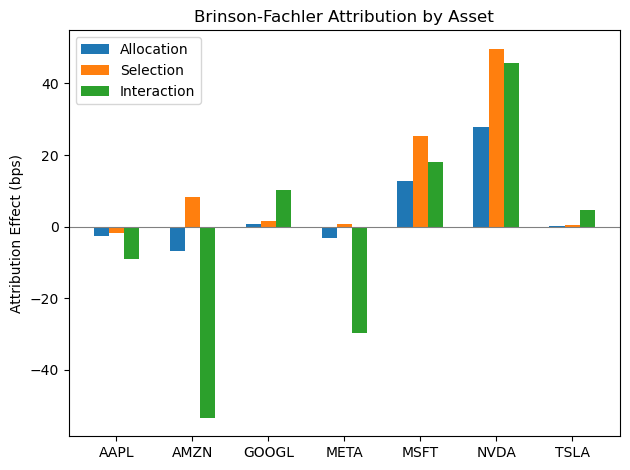

In [26]:
# Plotting individual attribution effects per asset
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(norm_brinson_fachler_df))

# Plot each component
ax.bar(x - bar_width, norm_brinson_fachler_df["allocation"], width=bar_width, label="Allocation")
ax.bar(x, norm_brinson_fachler_df["selection"], width=bar_width, label="Selection")
ax.bar(x + bar_width, norm_brinson_fachler_df["interaction"], width=bar_width, label="Interaction")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(norm_brinson_fachler_df.index)
ax.set_ylabel("Attribution Effect (bps)")
ax.set_title("Brinson-Fachler Attribution by Asset")
ax.legend()
ax.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()